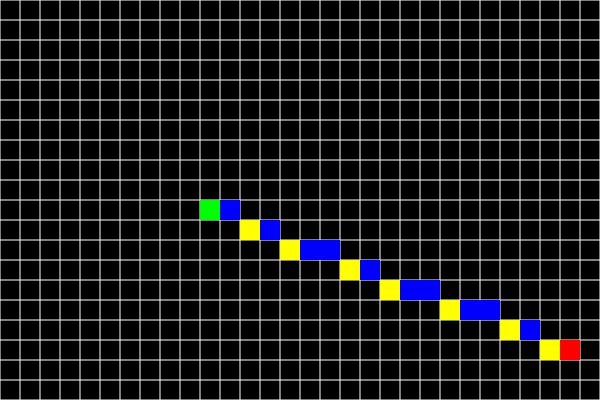

In [32]:
import cairo
from IPython.display import SVG, display, Image

surface_size_x = 600
surface_size_y = 400
pixel_width = 20

x1 = 10
y1 = 10
x2 = 28
y2 = 17

def drawGrid(size_x, size_y, pixel_size, ct):
    for i in range(int(size_x / pixel_size)):
        for j in range(int(size_y / pixel_size)):
            ct.rectangle(i*pixel_size, j*pixel_size, pixel_size, pixel_size)
    ct.stroke()

def drawPixel(x, y, ct, r, g, b):
    ct.set_source_rgb(r, g, b)
    ct.rectangle(x*pixel_width, y*pixel_width, pixel_width, pixel_width)
    ct.fill()

def drawLine(x1, y1, x2, y2):
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    up = True

    if (dx < dy): # Slope >= 1
        temp = x1
        x1 = y1
        y1 = temp

        temp = x2
        x2 = y2
        y2 = temp

        temp = dx
        dx = dy
        dy = temp

        up = False


    m = 2 * dy - dx
    for i in range(0, dx):
        # print(m)
        # print(str(x1) + "," + str(y1))

        if (x1 < x2):
            x1 += 1
        else:
            x1 -= 1
        
        if (m < 0):
            if (up): # 
                drawPixel(x1, y1, ctx, 0, 0, 1) # Blue down\
                m += 2 * dy
            else:
                drawPixel(y1, x1, ctx, 0, 1, 1) # Cyan up\
                m += 2 * dy
        else:
            if (y1 < y2):
                y1 += 1
            else:
                y1 -= 1

            if (up): # 
                drawPixel(x1, y1, ctx, 1, 1, 0) # Yellow down/
            else:
                drawPixel(y1, x1, ctx, 1, 0, 1) # Pink up/

            m += 2 * dy - 2 * dx
        
        # print(str(x1) + "," + str(y1))

def drawrectangle(x1, y1, x2, y2, fill):
    pass

with cairo.SVGSurface("example.svg", 600, 400) as surface:
    cairo.ImageSurface(cairo.FORMAT_RGB24, surface_size_x, surface_size_y)
    ctx = cairo.Context(surface)
    ctx.set_source_rgb(0.0, 0.0, 0.0)
    ctx.paint()
    ctx.set_source_rgba(1.0, 1.0, 1.0)
    ctx.set_line_width(1)
    drawGrid(surface_size_x, surface_size_y, pixel_width, ctx)
    
    drawLine(x1, y1, x2, y2)
    drawPixel(x1, y1, ctx, 0, 1, 0) # Start Green
    drawPixel(x2, y2, ctx, 1, 0, 0) # Finish Red


    surface.write_to_png('rectangle.png')

display(SVG(filename="example.svg"))

# down/     up/     down\   up\
# 10        10      10      10
# 10        10      10      10
# 2         15      17      2
# 15        2       12      5

# Marvin Adinata
# 312110009


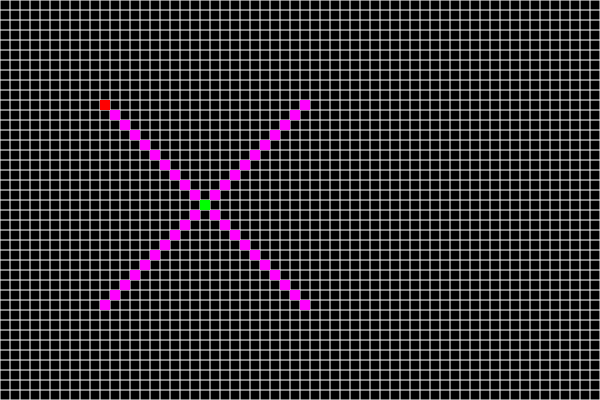

In [18]:
import cairo
from IPython.display import SVG, display, Image

surface_size_x = 600
surface_size_y = 400
pixel_width = 10

x1 = 20
y1 = 20
x2 = 10
y2 = 10

def drawGrid(size_x, size_y, pixel_size, ct):
    for i in range(int(size_x / pixel_size)):
        for j in range(int(size_y / pixel_size)):
            ct.rectangle(i*pixel_size, j*pixel_size, pixel_size, pixel_size)
    ct.stroke()

def drawPixel(x, y, ct, r, g, b):
    ct.set_source_rgb(r, g, b)
    ct.rectangle(x*pixel_width, y*pixel_width, pixel_width, pixel_width)
    ct.fill()

def drawLine(x1, y1, x2, y2):
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    up = True

    if (dx < dy): # Slope >= 1
        temp = x1
        x1 = y1
        y1 = temp

        temp = x2
        x2 = y2
        y2 = temp

        temp = dx
        dx = dy
        dy = temp

        up = False

    p = 2 * dy - dx
    for i in range(0, dx):
        # print(m)
        # print(str(x1) + "," + str(y1))

        if (x1 < x2):
            x1 += 1
        else:
            x1 -= 1
        
        if (p < 0):
            if (up): # 
                drawPixel(x1, y1, ctx, 1, 0, 1)
                m += 2 * dy
            else:
                drawPixel(y1, x1, ctx, 1, 0, 1)
                p += 2 * dy
        else:
            if (y1 < y2):
                y1 += 1
            else:
                y1 -= 1

            if (up): # 
                drawPixel(x1, y1, ctx, 1, 0, 1)
            else:
                drawPixel(y1, x1, ctx, 1, 0, 1) 

            p += 2 * dy - 2 * dx
        
        # print(str(x1) + "," + str(y1))

# From Class
def drawDDA(x1, y1, x2, y2, r, g, b):
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)

    if (dy > dx):
        step = dy
    else:
        step = dx

    incx = dx / float(step)
    incy = dy / float(step)

    drawPixel(x1, y1, ctx, r, g, b)

    for i in range(step):
        x1 += incx
        y1 += incy
        drawPixel(int(x1), int(y1), ctx, r, g, b)

def drawRectangle(x1, y1, x2, y2, fill):
    # Decide what point the rectangle start to draw
    if (x2 < x1):
        temp = x1
        x1 = x2
        x2 = temp
    if (y2 < y1):
        temp = y1
        y1 = y2
        y2 = temp
    
    # Draw Outer Lines 
    # Last 3 drawDDA parameter is for the color
    drawDDA(x1, y1, x1, y2, 1, 0, 1)
    drawDDA(x1, y1, x2, y1, 0, 1, 1)
    drawDDA(x2, y1, x2, y2, 1, 0, 1)
    drawDDA(x1, y2, x2, y2, 0, 1, 1)

    # Fill the inner rectangle
    if (fill):
        for i in range(1, abs(x2-x1)):
            # print(i)
            drawDDA(x1 + i, y1 + 1, x1 + i, y2 - 1, 0, 0, 1)

def bressenham(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    p = 2 * dy - dx

    drawPixel(x1, y1, ctx, 1, 0, 1)
    for i in range(x1 + 1, x2 + 1):
        if (p < 0):
            x1 += 1
            p += 2 * dy
        else:
            x1 += 1
            y1 += 1
            p += 2 * dy - 2 * dx
        drawPixel(x1, y1, ctx, 1, 0, 1)
        


with cairo.SVGSurface("example.svg", 600, 400) as surface:
    cairo.ImageSurface(cairo.FORMAT_RGB24, surface_size_x, surface_size_y)
    ctx = cairo.Context(surface)
    ctx.set_source_rgb(0.0, 0.0, 0.0)
    ctx.paint()
    ctx.set_source_rgba(1.0, 1.0, 1.0)
    ctx.set_line_width(1)
    drawGrid(surface_size_x, surface_size_y, pixel_width, ctx)
    
    # bressenham(x1, y1, x2, y2)
    # drawLine(x1, y1, x2, y2)
    # drawDDA(15, 15, 0, 0, 0, 0, 1)
    # drawDDA(15, 8, 15, 0, 0, 1, 1)
    # drawDDA(15, 0, 0, 15, 1, 0, 1)
    # drawDDA(0, 15, 15, 0, 1, 1, 0)

    drawLine(x1, y1, x2, y2)
    drawLine(x1, y1, x2 + 20, y2 + 20)
    drawLine(x1, y1, x2, y2 + 20)
    drawLine(x1, y1, x2 + 20, y2)

    drawPixel(x1, y1, ctx, 0, 1, 0) # Start Green
    drawPixel(x2, y2, ctx, 1, 0, 0) # Finish Red


    surface.write_to_png('rectangle.png')

display(SVG(filename="example.svg"))

# down/     up/     down\   up\
# 10        10      10      10
# 10        10      10      10
# 2         15      17      2
# 15        2       12      5

# Marvin Adinata
# 312110009


In [4]:
y_start = 3
y_delta = -1.25

for i in range(0, 4):
    y_start += y_delta
    print(y_start, round(y_start))


1.75 2
0.5 0
-0.75 -1
-2.0 -2
